### Comparison between linear classifier vs neural network with 1 hidden layer vs with 2 hidden layers

Accuracies:
* linear: 51.3%
* 1-hidden: 98.3%
* 2-hidden: 99.3%

In [107]:
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

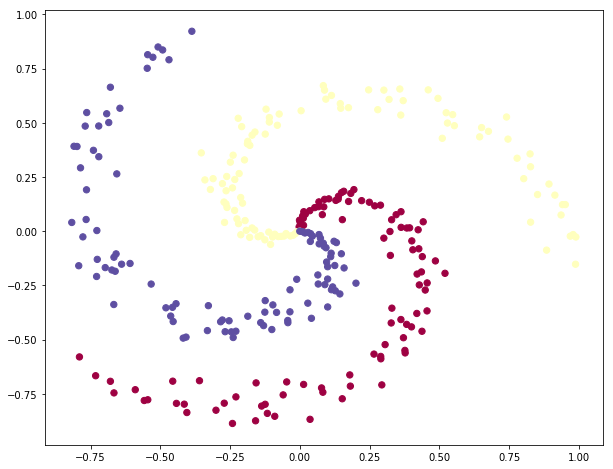

In [110]:
N = 100 # points per class
D = 2 # dimensions
K = 3 # classes
X = np.zeros((N*K, D))
y = np.zeros(N*K, dtype='uint8') # labels
for j in range(K):
    ix = range(N*j, N*(j+1))
    r = np.linspace(0.0, 1, N) # radius
    t = np.linspace(j*4, (j+1)*4, N) + np.random.randn(N)*0.2 # theta
    X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
    y[ix] = j
    
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.show()

In [52]:
# random initilization
W = 0.01 * np.random.randn(D, K)
b = np.zeros((1, K))

step_size = 1e-0
reg = 1e-3
n_examples = X.shape[0]

Softmax classifier

\begin{equation}
 L_i = - log\Bigg( \frac {e^{f_{yi}}} {\sum_j e^f_j} \Bigg)
\end{equation}

Full Softmax loss contain: data loss + reqularization loss
\begin{equation}
 L = \frac 1 N \sum_i L_i + \frac 1 2 \lambda \sum_k \sum_l W_{k,l}^2
\end{equation}

Gradient Descent for Backpropagation

\begin{equation}
p_k = \frac {e^{f_k}} {\sum_j {e^{f_j}}}, 
L_i = - log \big(p_{y_i} \big), 
\frac {\partial L_i} {\partial f_k} = p_k - \mathbb{1} (y_i = k)
\end{equation}

In [53]:
# gradient descent loop
for i in range(N*D):
    scores = np.dot(X, W) + b
    exp_scores = np.exp(scores)
    
    # probabilities
    prob = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)

    # loss: avg cross-entropy loss & regularization loss
    corr_log = -np.log(prob[range(n_examples), y])
    data_loss = np.sum(corr_log)/n_examples
    reg_loss = 0.5 * reg * np.sum(W*W)
    loss = data_loss + reg_loss
    
    if i % 10 == 0:
        print("Iter {} loss {}".format(i, loss))
    
    # compute gradient
    dscores = prob
    dscores[range(n_examples), y] -= 1
    dscores /= n_examples
    
    # backpropagation of W & b
    dW = np.dot(X.T, dscores)
    db = np.sum(dscores, axis=0, keepdims=True)
    
    dW += reg*W
    W += -step_size * dW
    b += -step_size * db

Iter 0 loss 1.0973970557762114
Iter 10 loss 0.9142762024605642
Iter 20 loss 0.8470212429028169
Iter 30 loss 0.8169745553272714
Iter 40 loss 0.8016214714564467
Iter 50 loss 0.7930466472977229
Iter 60 loss 0.7879549503681392
Iter 70 loss 0.784795546797075
Iter 80 loss 0.7827699655912493
Iter 90 loss 0.7814384569300897
Iter 100 loss 0.780545963260992
Iter 110 loss 0.7799384113988839
Iter 120 loss 0.779519656887873
Iter 130 loss 0.7792281037611182
Iter 140 loss 0.7790234299952057
Iter 150 loss 0.7788787658415932
Iter 160 loss 0.7787759390118287
Iter 170 loss 0.7787025066483334
Iter 180 loss 0.7786498602774001
Iter 190 loss 0.7786119921730635


In [55]:
scores = np.dot(X, W) + b

prediction = np.argmax(scores, axis=1)
print('accuracy {}'.format(np.mean(prediction == y)))

accuracy 0.5133333333333333


(-1.8869685083005447, 1.9130314916994586)

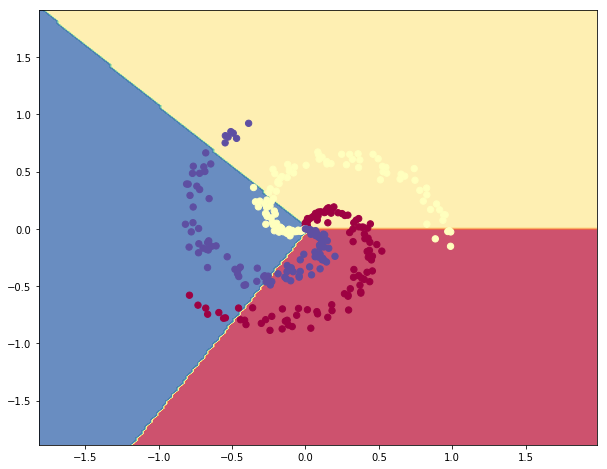

In [111]:
h = 0.02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = np.dot(np.c_[xx.ravel(), yy.ravel()], W) + b
Z = np.argmax(Z, axis=1)
Z = Z.reshape(xx.shape)
fig = plt.figure()
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

In [98]:
# random initialization of parameters - h_s is a size of hidden layer
h_s = 100
W1 = 0.01 * np.random.randn(D, h_s)
b1 = np.zeros((1, h_s))
W2 = 0.01 * np.random.randn(h_s, K)
b2 = np.zeros((1, K))

In [99]:
step_size = 1.0
reg = 1e-3

n_examples = X.shape[0]

Remember during backpropagation that with ReLu:
\begin{equation}
r = max(0, x), \frac {dr}{dx} =1(x > 0)
\end{equation}

Which lets pass gradient through if input is greater than 0, else it kills it

In [100]:
for i in range(10001):

    # forward pass, mind the tiny difference between linear classifier and neural network
    hidden = np.maximum(0, np.dot(X, W1) + b1) # ReLU activation
    scores = np.dot(hidden, W2) + b2
    exp_scores = np.exp(scores)
    
    prob = exp_scores/np.sum(exp_scores, axis=1, keepdims=True)

    # loss: avg cross-entropy loss & regularization loss
    corr_log = -np.log(prob[range(n_examples), y])
    data_loss = np.sum(corr_log)/n_examples
    reg_loss = 0.5 * reg * (np.sum(W1*W1) + np.sum(W2*W2))
    loss = data_loss + reg_loss
    if i % 1000 == 0:
        print('iter {} loss {}'.format(i, loss))
    
    # compute gradient
    dscores = prob
    dscores[range(n_examples), y] -= 1
#     if i % 1000 == 0:
#         print(dscores[range(n_examples), y])
    dscores /= n_examples
    
    # backpropagation of W2, b2, hidden, W1, b2
    dW2 = np.dot(hidden.T, dscores)
    db2 = np.sum(dscores, axis=0, keepdims=True)
    
    dhidden = np.dot(dscores, W2.T)
    dhidden[hidden <= 0] = 0
    
    dW1 = np.dot(X.T, dhidden)
    db1 = np.sum(dhidden, axis=0, keepdims=True)
    
    dW2 += reg * W2
    dW1 += reg * W1
    
    W1 += -step_size * dW1
    b1 += -step_size * db1
    W2 += -step_size * dW2
    b2 += -step_size * db2

iter 0 loss 1.0986289553535937
iter 1000 loss 0.3024667643059838
iter 2000 loss 0.26101088532981764
iter 3000 loss 0.2578493785221982
iter 4000 loss 0.25641524395773635
iter 5000 loss 0.2549150909864546
iter 6000 loss 0.2548175510953815
iter 7000 loss 0.25500010736566264
iter 8000 loss 0.25508237681718904
iter 9000 loss 0.2550164481553494
iter 10000 loss 0.2549603461441693


In [103]:
hidden = np.maximum(0, np.dot(X, W1) + b1)
scores = np.dot(hidden, W2) + b2
prediction = np.argmax(scores, axis=1)
print ('accuracy {}'.format(np.mean(prediction == y)))

accuracy 0.9833333333333333


(-1.8869685083005447, 1.9130314916994586)

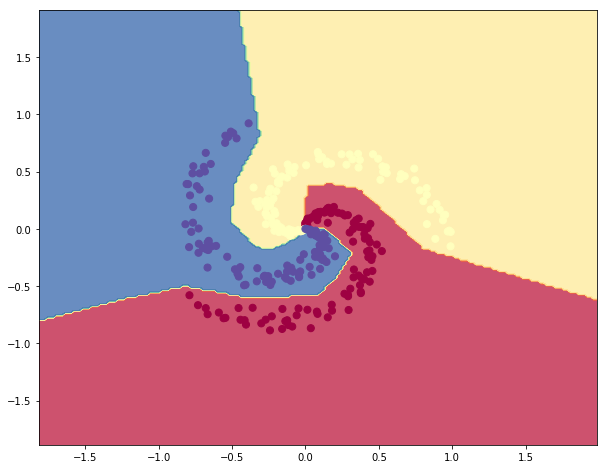

In [129]:
h = 0.02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = np.dot(np.maximum(0, np.dot(np.c_[xx.ravel(), yy.ravel()], W1) + b1), W2) + b2
Z = np.argmax(Z, axis=1)
Z = Z.reshape(xx.shape)
fig = plt.figure()
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap=plt.cm.Spectral)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

In [122]:
h_1 = 100
h_2 = 100
W_1 = 0.01 * np.random.randn(D, h_1)
b_1 = np.zeros((1, h_1))
W_2 = 0.01 * np.random.randn(h_2, K)
b_2 = np.zeros((1, K))

In [123]:
step_size = 1e-0
reg = 1e-3

num_examples = X.shape[0]

In [124]:
for i in range(10001):

    # forward pass, mind the tiny difference between linear classifier and neural network
    hidden_1 = np.maximum(0, np.dot(X, W_1) + b_1) # ReLU activation
    hidden_2 = np.maximum(0, hidden_1)
    scores = np.dot(hidden_2, W_2) + b_2
    exp_scores = np.exp(scores)
    
    prob = exp_scores/np.sum(exp_scores, axis=1, keepdims=True)

    # loss: avg cross-entropy loss & regularization loss
    corr_log = -np.log(prob[range(n_examples), y])
    data_loss = np.sum(corr_log)/n_examples
    reg_loss = 0.5 * reg * (np.sum(W_1*W_1) + np.sum(W_2*W_2))
    loss = data_loss + reg_loss
    if i % 1000 == 0:
        print('iter {} loss {}'.format(i, loss))
    
    # compute gradient
    dscores = prob
    dscores[range(n_examples), y] -= 1
#     if i % 1000 == 0:
#         print(dscores[range(n_examples), y])
    dscores /= n_examples
    
    # backpropagation of W2, b2, hidden, W1, b2
    dW_2 = np.dot(hidden_2.T, dscores)
    db_2 = np.sum(dscores, axis=0, keepdims=True)
    
    dhidden_2 = np.dot(dscores, W_2.T)
    dhidden_2[hidden_2 <= 0] = 0
    
    dhidden_1 = dhidden_2
    dhidden_1[hidden_1 <= 0] = 0
    
    dW_1 = np.dot(X.T, dhidden_1)
    db_1 = np.sum(dhidden_1, axis=0, keepdims=True)
    
    dW_2 += reg * W_2
    dW_1 += reg * W_1
    
    W_1 += -step_size * dW_1
    b_1 += -step_size * db_1
    W_2 += -step_size * dW_2
    b_2 += -step_size * db_2

iter 0 loss 1.0986558295803945
iter 1000 loss 0.2841120897156789
iter 2000 loss 0.271361571606092
iter 3000 loss 0.25650738595403205
iter 4000 loss 0.2528500482664716
iter 5000 loss 0.25006354226659694
iter 6000 loss 0.245812696077398
iter 7000 loss 0.24313149091925207
iter 8000 loss 0.24087957043448782
iter 9000 loss 0.2404448564783654
iter 10000 loss 0.2402014014142942


In [125]:
hidden_1 = np.maximum(0, np.dot(X, W_1) + b_1)
hidden_2 = np.maximum(0, hidden_1)
scores = np.dot(hidden_2, W_2) + b_2
prediction = np.argmax(scores, axis=1)
print ('accuracy {}'.format(np.mean(prediction == y)))

accuracy 0.9933333333333333


(-1.8869685083005447, 1.9130314916994586)

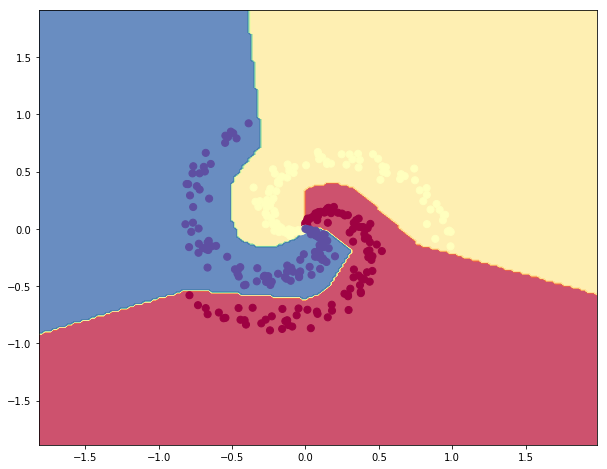

In [134]:
h = 0.02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = np.dot(np.maximum(0, np.dot(np.c_[xx.ravel(), yy.ravel()], W_1) + b_1), W_2) + b_2
Z = np.argmax(Z, axis=1)
Z = Z.reshape(xx.shape)
fig = plt.figure()
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap=plt.cm.Spectral)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())